# 합성곱 신경망을 사용한 이미지 분류

In [3]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf # TensorFlow 라이브러리 임포트

tf.keras.utils.set_random_seed(42) # 케라스의 랜덤 시드 설정

## 패션 MNIST 데이터 불러오기

In [4]:
from tensorflow import keras # 케라스 모듈 임포트
from sklearn.model_selection import train_test_split # 데이터 분할을 위한 train_test_split 함수 임포트

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data() # 패션 MNIST 데이터셋 불러오기

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0 # 훈련 데이터를 0-1 범위로 정규화하고 차원 추가

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42) # 훈련 데이터를 검증 세트로 분할

## 합성곱 신경망 만들기

In [5]:
model = keras.Sequential() # 순차 모델 생성

In [6]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu',
                              padding='same', input_shape=(28,28,1))) # 첫 번째 합성곱 층 추가

c:\Users\ryan9\miniconda3\envs\sesac_ai\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.add(keras.layers.MaxPooling2D(2)) # 최대 풀링 층 추가

In [8]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu',
                              padding='same')) # 두 번째 합성곱 층 추가
model.add(keras.layers.MaxPooling2D(2)) # 최대 풀링 층 추가

In [9]:
model.add(keras.layers.Flatten()) # 평탄화 층 추가
model.add(keras.layers.Dense(100, activation='relu')) # 완전 연결 층 추가
model.add(keras.layers.Dropout(0.4)) # 드롭아웃 층 추가
model.add(keras.layers.Dense(10, activation='softmax')) # 출력 층 추가

In [10]:
model.summary() # 모델 요약 출력

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       313,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

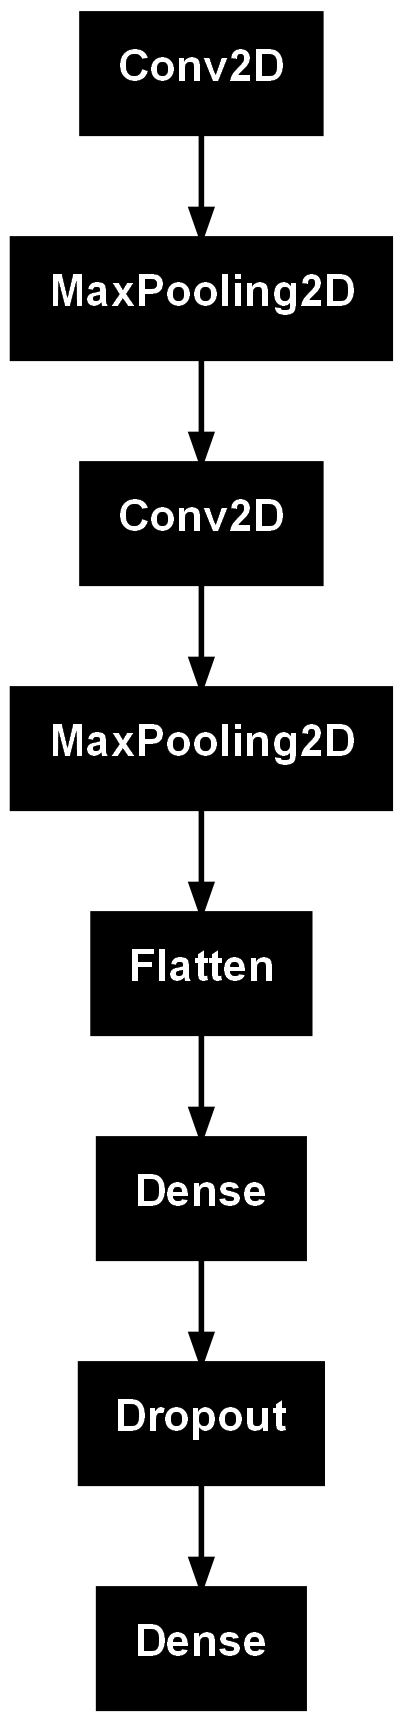

In [11]:
keras.utils.plot_model(model) # 모델 구조 시각화

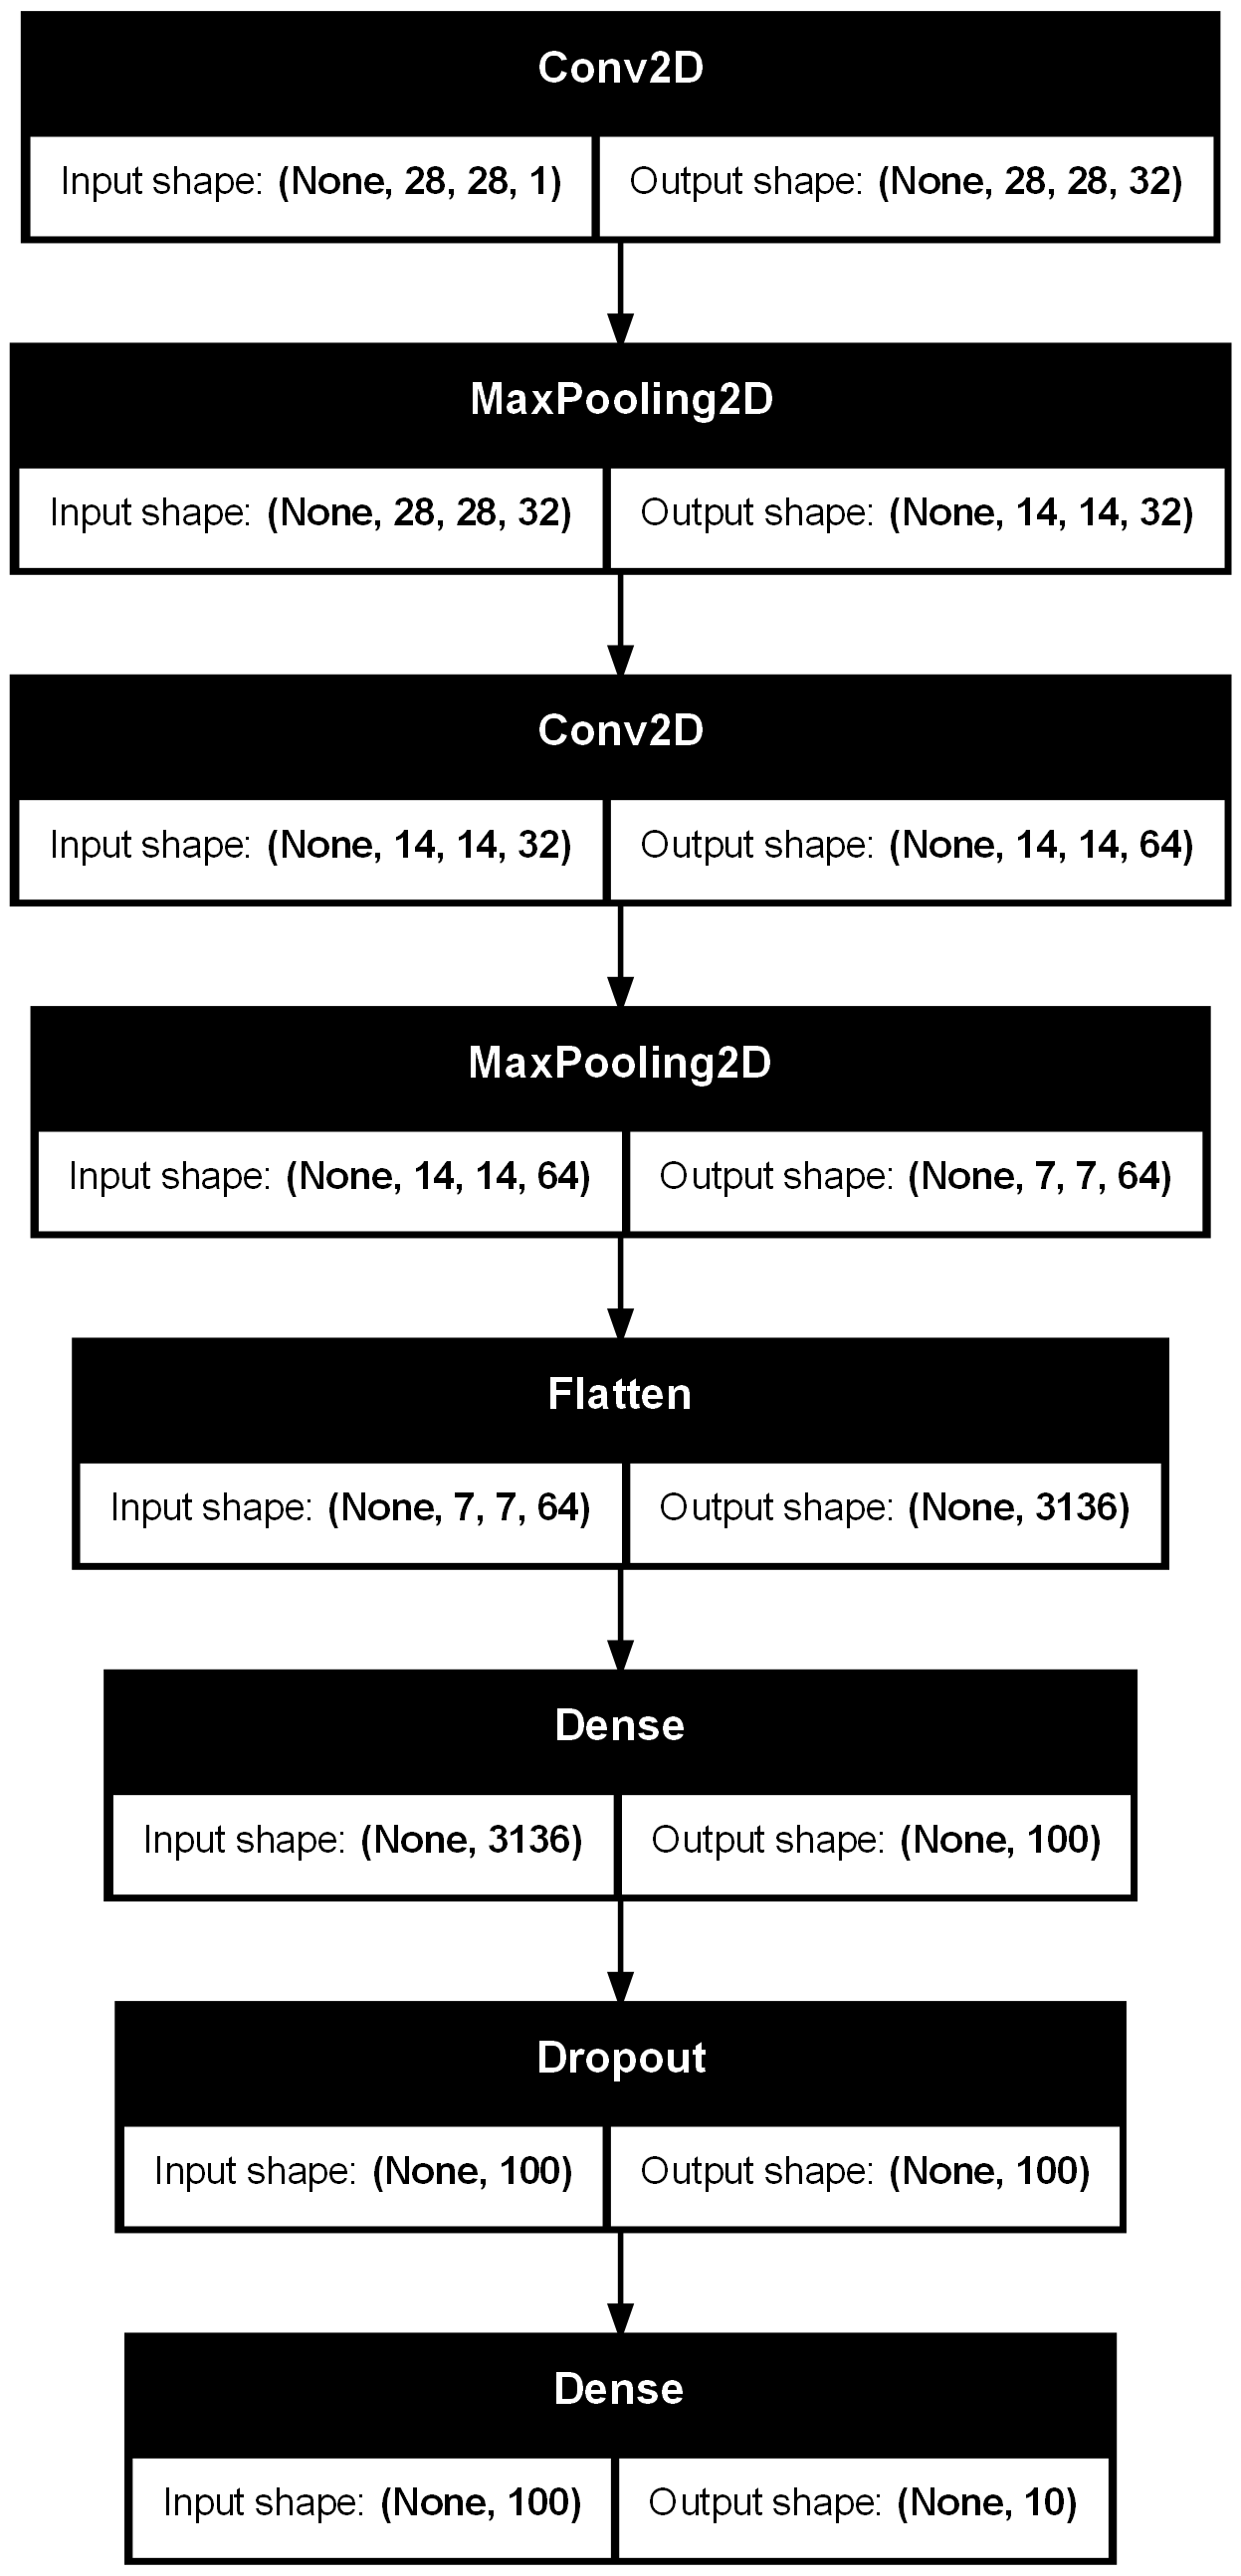

In [12]:
keras.utils.plot_model(model, show_shapes=True) # 모델 구조 시각화 (입력과 출력 형태 표시)

## 모델 컴파일과 훈련

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # 모델 컴파일

checkpoint_cb = keras.callbacks.ModelCheckpoint('models/best-cnn-model.keras',
                                                save_best_only=True) # 체크포인트 콜백 설정
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True) # 조기 종료 콜백 설정

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]) # 모델 훈련

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.7402 - loss: 0.7254 - val_accuracy: 0.8771 - val_loss: 0.3317
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8659 - loss: 0.3684 - val_accuracy: 0.8929 - val_loss: 0.2902
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.8867 - loss: 0.3096 - val_accuracy: 0.9025 - val_loss: 0.2603
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.8988 - loss: 0.2751 - val_accuracy: 0.9117 - val_loss: 0.2432
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9074 - loss: 0.2522 - val_accuracy: 0.9107 - val_loss: 0.2408
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9147 - loss: 0.2312 - val_accuracy: 0.9165 - val_loss: 0.2358
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.9184 - loss: 0.2140 - val_accuracy: 0.9168 - val_loss: 0.2407
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.9261 -

In [14]:
import matplotlib.pyplot as plt # matplotlib.pyplot 모듈 임포트

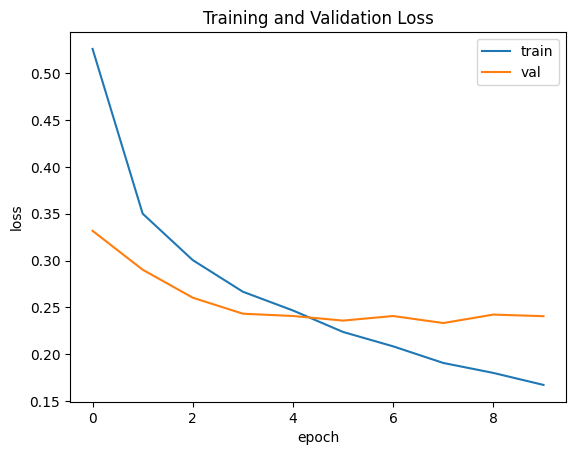

In [15]:
plt.plot(history.history['loss']) # 훈련 손실 그래프
plt.plot(history.history['val_loss']) # 검증 손실 그래프
plt.xlabel('epoch') # x축 레이블 설정
plt.ylabel('loss') # y축 레이블 설정
plt.title('Training and Validation Loss') # 그래프 제목 설정
plt.legend(['train', 'val']) # 범례 추가
plt.show() # 그래프 표시

In [16]:
model.evaluate(val_scaled, val_target) # 검증 세트에 대한 모델 평가

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9180 - loss: 0.2284


[0.23321840167045593, 0.9180833101272583]

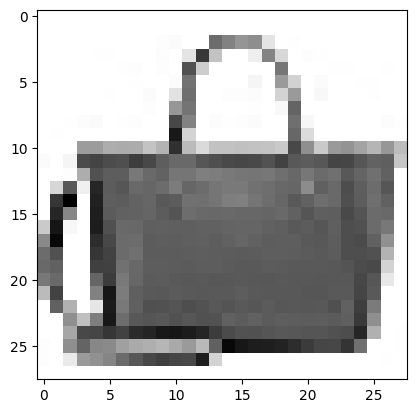

In [17]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r') # 검증 세트의 첫 번째 이미지 시각화
plt.show() # 예측 결과 출력

In [18]:
preds = model.predict(val_scaled[0:1]) # 검증 세트의 첫 번째 이미지에 대한 예측 수행
print(preds) # 예측 결과 출력 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
[[1.30106245e-20 7.18961625e-29 6.11908928e-22 1.55482833e-21
  1.84702946e-23 2.56574700e-22 1.72255051e-19 2.45204994e-20
  1.00000000e+00 4.78726942e-22]]


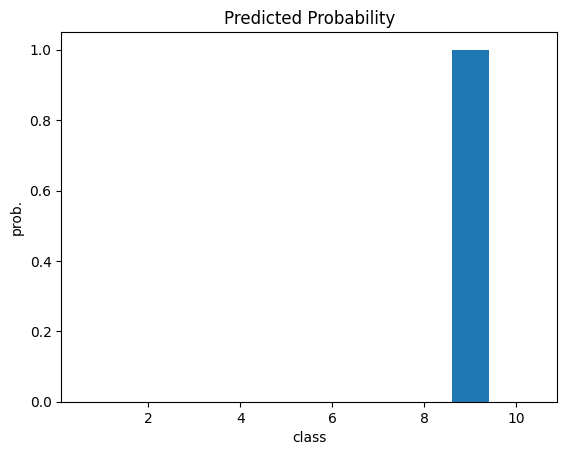

In [19]:
plt.bar(range(1, 11), preds[0]) # 예측 확률 막대 그래프
plt.xlabel('class') # x축 레이블 설정
plt.ylabel('prob.') # y축 레이블 설정
plt.title('Predicted Probability') # 그래프 제목 설정
plt.show() # 예측 확률 그래프 표시

In [20]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠'] # 클래스 이름 리스트

In [21]:
import numpy as np  # NumPy 모듈 임포트
print(classes[np.argmax(preds)]) # 예측된 클래스 이름 출력

가방


In [22]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0 # 테스트 데이터를 0-1 범위로 정규화하고 차원 추가

In [23]:
model.evaluate(test_scaled, test_target) # 테스트 세트에 대한 모델 평가

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9098 - loss: 0.2701


[0.25320446491241455, 0.9128000140190125]